# Table of Contents
* [Introduction](#Introduction)
	* [Domain](#Domain)
	* [Number of States, S](#Number-of-States,-S)
	* [Number of Actions, A](#Number-of-Actions,-A)
	* [Transition Probability Matrix, P](#Transition-Probability-Matrix,-P)
	* [R Matrix](#R-Matrix)
	* [Plot of Transition Probabilities](#Plot-of-Transition-Probabilities)
	* [Plot of R Matrix](#Plot-of-R-Matrix)
	* [Learning Rate, $\alpha$](#Learning-Rate,-$\alpha$)
	* [Policy Selection, $\epsilon -greedy$](#Policy-Selection,-$\epsilon--greedy$)
* [Q Learning with different gamma values](#Q-Learning-with-different-gamma-values)
	* [Q Learning with Gamma = 0.5](#Q-Learning-with-Gamma-=-0.5)
		* [Results Q Learning Gamma = 0.5](#Results-Q-Learning-Gamma-=-0.5)
	* [Q Learning with Gamma = 0](#Q-Learning-with-Gamma-=-0)
		* [Results Q Learning Gamma = 0](#Results-Q-Learning-Gamma-=-0)
	* [Q Learning with Gamma = 1](#Q-Learning-with-Gamma-=-1)
		* [Results Q Learning Gamma = 1](#Results-Q-Learning-Gamma-=-1)
	* [Comparison of Q Learning with Gamma values [0, 0.5 ,1]](#Comparison-of-Q-Learning-with-Gamma-values-[0,-0.5-,1])
* [Q Learning with different state and reward functions](#Q-Learning-with-different-state-and-reward-functions)
	* [With 20,000 Iterations](#With-20,000-Iterations)
* [100 x100 Grid - navigating a more 'realistic' world](#100-x100-Grid---navigating-a-more-'realistic'-world)
	* [Performance Comparison](#Performance-Comparison)
	* [Q Matrix Comparison](#Q-Matrix-Comparison)
* [Comparisons](#Comparisons)
	* [How do the Optimal Policies compare between the different runs of Q Learning?](#How-do-the-Optimal-Policies-compare-between-the-different-runs-of-Q-Learning?)
	* [How do the V Values compare between the different runs?](#How-do-the-V-Values-compare-between-the-different-runs?)
	* [How does the performance compare for the different iterations?](#How-does-the-performance-compare-for-the-different-iterations?)
	* [How do the runtimes compare between the different iterations?](#How-do-the-runtimes-compare-between-the-different-iterations?)


# Introduction

## Domain

We consider a case where an agent moves in a NxN grid and tries to find the optimal way around this grid while navigating various obstacles. We represent all possible states that the agent can move into with either 0 or positive numbers. We represent obstacles with negative numbers. In order to do so we will need to define a Markov Decision Process (MDP). This will be defined in a matrix form. The analysis will ber performed in Python using the [MDP Toolbox](https://pymdptoolbox.readthedocs.org/en/latest/index.html), [Numpy](Stéfan van der Walt, S. Chris Colbert and Gaël Varoquaux. The NumPy Array: A Structure for Efficient Numerical Computation, Computing in Science & Engineering, 13, 22-30, 2011, DOI:10.1109/MCSE.2011.37) and [Matplotlib](John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 ,2007, DOI:10.1109/MCSE.2007.55) packages. 

The package at the moment works in a 3D matrix sense only so the Q Learning algorithm implementation here expects a (A,S,S) transition probability matrix and a (A,S) reward matrix. So we use the utility to generate a (N,N,N) problem space to be compliant with the requirements.

**Note that Python uses 0 based indexing**

In [1]:
#Import some libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import mdptoolbox as mdp
import mdptoolbox.example
import seaborn as sns
np.random.seed(0)
%matplotlib inline
plt.style.use('ggplot')
from IPython.display import display, Math, Latex

In [86]:
#Set plotting styles
c= sns.plotting_context("poster", font_scale=3, rc={"lines.linewidth": 3.5})

## Number of States, S

In [3]:
S=6

## Number of Actions, A

In [4]:
A=6

## Transition Probability Matrix, P

In [5]:
P, R = mdptoolbox.example.rand(S,A, is_sparse=False)

In [6]:
P[1:2,]

array([[[ 0.28619179,  0.        ,  0.36763563,  0.        ,  0.34617258,
          0.        ],
        [ 0.        ,  0.11466841,  0.13597694,  0.27825365,  0.25150863,
          0.21959237],
        [ 0.        ,  0.21384415,  0.        ,  0.22139517,  0.26564833,
          0.29911235],
        [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          1.        ],
        [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
          0.        ]]])

In [7]:
print(P.shape[1])
print(P.shape[0])

6
6


## R Matrix

In [8]:
R[1:2,]

array([[[-0.39685037,  0.        , -0.41984479,  0.        , -0.1424626 ,
         -0.        ],
        [-0.        ,  0.83896523,  0.4284826 ,  0.99769401, -0.70110339,
          0.73625211],
        [ 0.        , -0.97657183, -0.        ,  0.45998112, -0.65674065,
          0.04207321],
        [-0.46547492,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        , -0.        ,  0.        ,
          0.21409012],
        [-0.        ,  0.        ,  0.        , -0.08774046, -0.        ,
          0.        ]]])

In [9]:
print(R.shape[1])
print(R.shape[0])

6
6


## Plot of Transition Probabilities

**Here we plot the transition probability matrix and show in light colors the low probability areas and in dark colors the high probability areas. Due to the 3D nature of these matrices we stack in the vertical direction for plotting**

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
         27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5]),
 <a list of 36 Text yticklabel objects>)

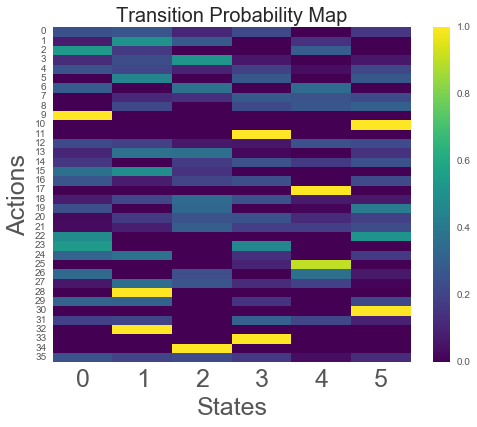

In [57]:
plt.figure(figsize=(8,6))
plt.title("Transition Probability Map", fontsize=20)
sns.heatmap(np.vstack(P), cmap=plt.cm.viridis)
plt.xlabel("States", fontsize=25)
plt.ylabel('Actions', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=10)

## Plot of R Matrix

Here we plot the transition probability matrix and show in light colors the low probability areas and in dark colors the high probability areas.

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
         27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5]),
 <a list of 36 Text yticklabel objects>)

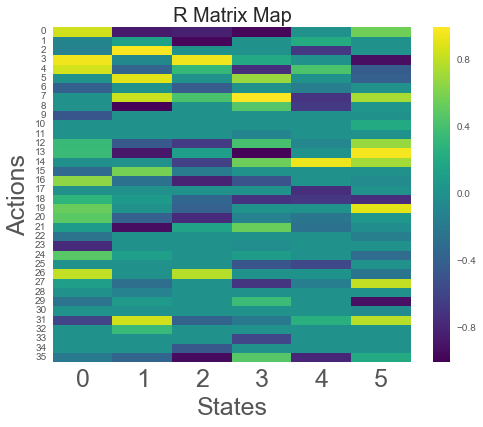

In [58]:
plt.figure(figsize=(8,6))
sns.heatmap(np.vstack(R), cmap=plt.cm.viridis)
plt.title("R Matrix Map", fontsize=20)
plt.xlabel("States", fontsize=25)
plt.ylabel('Actions', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=10)

## Learning Rate, $\alpha$

**We define our learning rate as a function of our number of episodes, n. This ensures a more dynamic learning rate as opposed a static value. We define our alpha s follows: $$\alpha = {1 \over \sqrt(n+2)}$$**

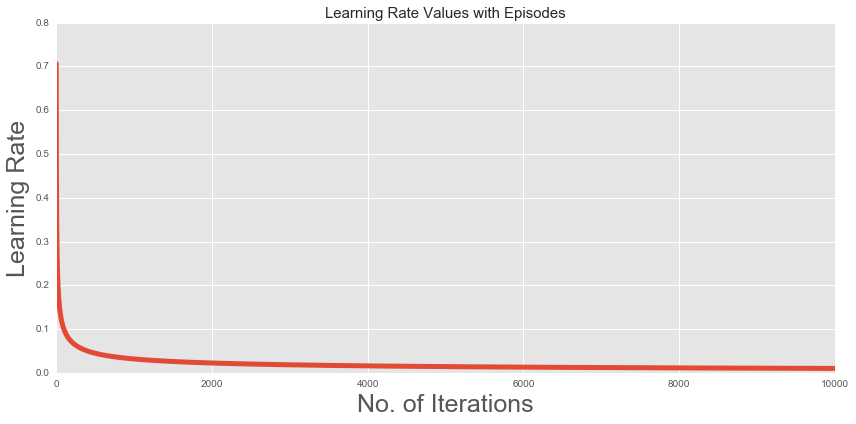

In [13]:
plt.figure(figsize=(12,6))
plt.plot(1/np.sqrt((np.arange(10000)+2)), linewidth =5)
plt.xlabel("No. of Iterations", fontsize=25)
plt.ylabel("Learning Rate", fontsize=25)
plt.title('Learning Rate Values with Episodes', fontsize=15)
plt.tight_layout()

## Policy Selection, $\epsilon -greedy$

**We use a $\epsilon$-greedy policy for all the testing in this section. We define our $\epsilon$ as: $$\epsilon = 1 - {1 \over \log(n+2)} $$ This is compared against a random number sampled from a continuous uniform distribution between the interval of [0,1]. When $\epsilon$ > than the random number the agent exploits and when it is less the agent explores.**

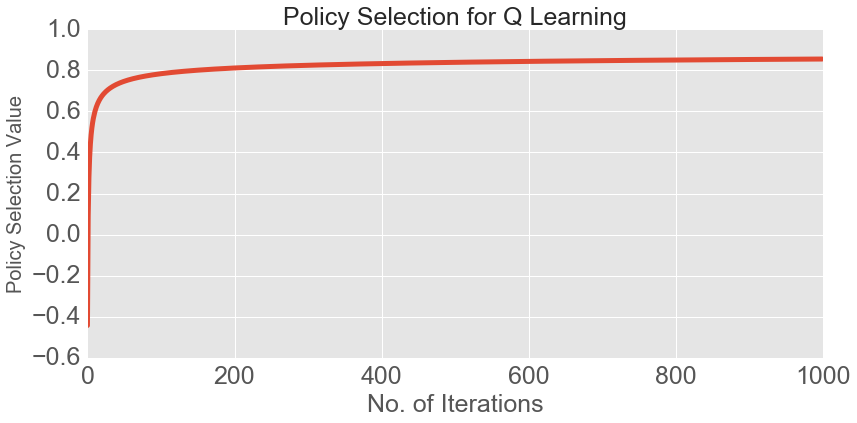

In [14]:
plt.figure(figsize=(12,6))
plt.plot((1- (1/(np.log(np.arange(1000)+2)))) , linewidth =5)
plt.xlabel("No. of Iterations", fontsize=25)
plt.ylabel("Policy Selection Value", fontsize=20)
plt.title('Policy Selection for Q Learning', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()

# Q Learning with different gamma values

## Q Learning with Gamma = 0.5

In [15]:
ql_1 = mdp.mdp.QLearning(P,R,0.5)
print("Initial Values")
print("Actions \n", ql_1.A)
print("Q Matrix \n",ql_1.Q )
print("Rewards \n", ql_1.R[1:2,])
ql_1.run()

Initial Values
Actions 
 6
Q Matrix 
 [[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
Rewards 
 [[[-0.39685037  0.         -0.41984479  0.         -0.1424626  -0.        ]
  [-0.          0.83896523  0.4284826   0.99769401 -0.70110339  0.73625211]
  [ 0.         -0.97657183 -0.          0.45998112 -0.65674065  0.04207321]
  [-0.46547492  0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.         -0.          0.          0.21409012]
  [-0.          0.          0.         -0.08774046 -0.          0.        ]]]


### Results Q Learning Gamma = 0.5

In [16]:
print('After Q Learing with Gamma %s' %ql_1.discount)
print("Actions :", ql_1.A)
print("Q Matrix \n",ql_1.Q )
print("Rewards \n", ql_1.R[1:2,])
print("Optimal Policy :", ql_1.policy)
print("Time taken :%g"%ql_1.time)
print("Total Iterations :", ql_1.max_iter)

After Q Learing with Gamma 0.5
Actions : 6
Q Matrix 
 [[ 0.02449109 -0.0344293   0.09234019 -0.13636232  0.0930445   0.41183435]
 [ 0.09017421  0.85850942  0.1058576   0.33269218 -0.13129809  0.15465009]
 [-0.1129266   0.09831385  0.75103282  0.0426225   0.4801443   0.36179264]
 [ 0.8827493  -0.24674176  0.29824492  0.15420645  0.09012653 -0.10706585]
 [-0.03450163  0.67621459  0.02383737  0.00795256  0.0724088  -0.03121429]
 [ 0.82631928  0.33833197 -0.32547418 -0.06665251  0.03771055 -0.03344386]]
Rewards 
 [[[-0.39685037  0.         -0.41984479  0.         -0.1424626  -0.        ]
  [-0.          0.83896523  0.4284826   0.99769401 -0.70110339  0.73625211]
  [ 0.         -0.97657183 -0.          0.45998112 -0.65674065  0.04207321]
  [-0.46547492  0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.         -0.          0.          0.21409012]
  [-0.          0.          0.         -0.08774046 -0.          0.        ]]]
Optimal Policy : (5, 1, 2, 

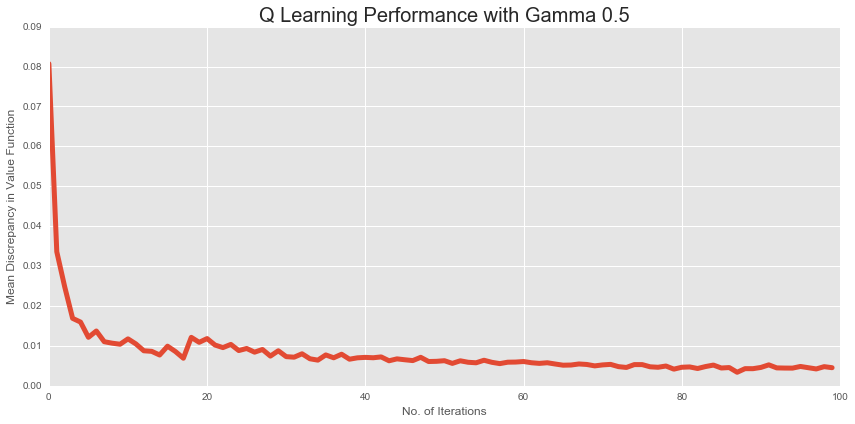

In [17]:
plt.figure(figsize=(12,6))
plt.plot(ql_1.mean_discrepancy, linewidth =5)
plt.xlabel("No. of Iterations")
plt.ylabel("Mean Discrepancy in Value Function")
plt.title('Q Learning Performance with Gamma %s' %ql_1.discount, fontsize=20)
plt.tight_layout()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text yticklabel objects>)

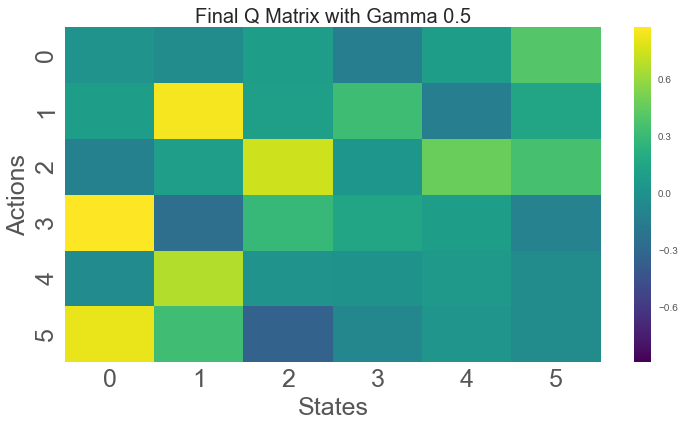

In [60]:
plt.figure(figsize=(12,6))
sns.heatmap(ql_1.Q, cmap=plt.cm.viridis)
plt.title('Final Q Matrix with Gamma %s' %ql_1.discount, fontsize=20)
plt.xlabel("States", fontsize=25)
plt.ylabel('Actions', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

## Q Learning with Gamma = 0

In [19]:
ql_2 = mdp.mdp.QLearning(P,R,0)
print("Initial Values")
print("Actions \n", ql_2.A)
print("Q Matrix \n",ql_2.Q )
print("Rewards \n", ql_2.R[1:2,])
ql_2.run()

Initial Values
Actions 
 6
Q Matrix 
 [[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
Rewards 
 [[[-0.39685037  0.         -0.41984479  0.         -0.1424626  -0.        ]
  [-0.          0.83896523  0.4284826   0.99769401 -0.70110339  0.73625211]
  [ 0.         -0.97657183 -0.          0.45998112 -0.65674065  0.04207321]
  [-0.46547492  0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.         -0.          0.          0.21409012]
  [-0.          0.          0.         -0.08774046 -0.          0.        ]]]


### Results Q Learning Gamma = 0

In [20]:
print('After Q Learing with Gamma %s' %ql_2.discount)
print("Actions :", ql_2.A)
print("Q Matrix \n",ql_2.Q )
print("Rewards \n", ql_2.R[1:2,])
print("Optimal Policy :", ql_2.policy)
print("Time taken :%g"%ql_2.time)
print("Total Iterations :", ql_2.max_iter)

After Q Learing with Gamma 0
Actions : 6
Q Matrix 
 [[ 0.02970631 -0.07597226  0.04629893 -0.10176937  0.18142385 -0.02801513]
 [-0.22144939  0.31211941 -0.05953707  0.37223549 -0.32992478  0.0744957 ]
 [-0.15842262 -0.12579506  0.12906559 -0.13319831  0.17429078  0.34408211]
 [ 0.54065493 -0.3262809   0.07551968  0.04284658 -0.13616605 -0.25762093]
 [-0.07853041  0.21408881 -0.00562782 -0.04469116 -0.03208163 -0.14823256]
 [ 0.40909225 -0.08771431 -0.49506372 -0.29472908 -0.19450835 -0.2481426 ]]
Rewards 
 [[[-0.39685037  0.         -0.41984479  0.         -0.1424626  -0.        ]
  [-0.          0.83896523  0.4284826   0.99769401 -0.70110339  0.73625211]
  [ 0.         -0.97657183 -0.          0.45998112 -0.65674065  0.04207321]
  [-0.46547492  0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.         -0.          0.          0.21409012]
  [-0.          0.          0.         -0.08774046 -0.          0.        ]]]
Optimal Policy : (4, 3, 5, 0,

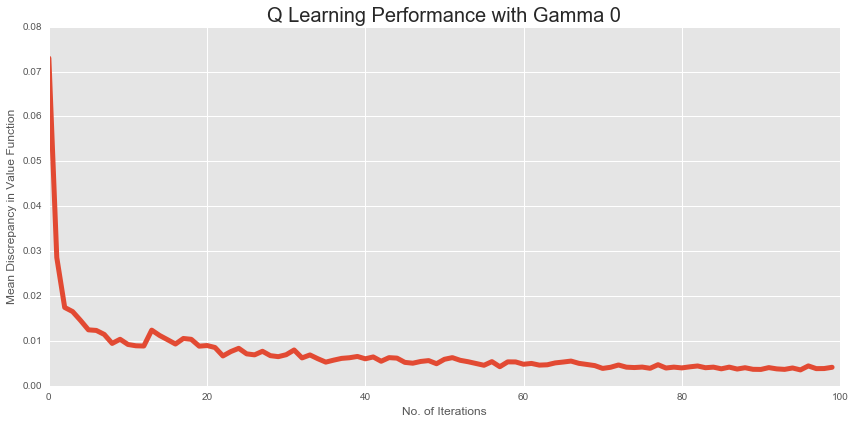

In [21]:
plt.figure(figsize=(12,6))
plt.plot(ql_2.mean_discrepancy, linewidth =5)
plt.xlabel("No. of Iterations")
plt.ylabel("Mean Discrepancy in Value Function")
plt.title('Q Learning Performance with Gamma %s' %ql_2.discount, fontsize=20)
plt.tight_layout()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text yticklabel objects>)

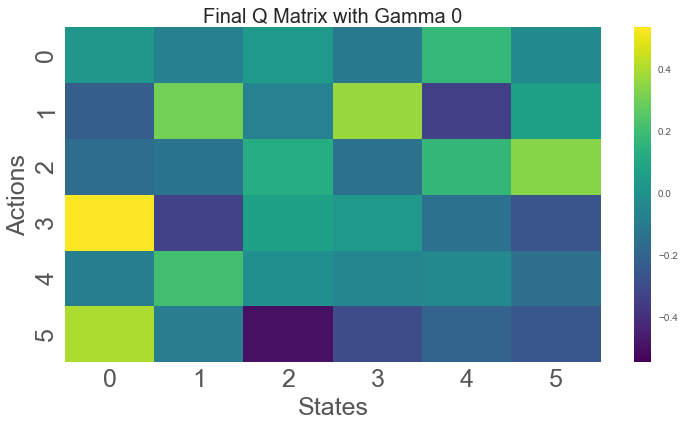

In [61]:
plt.figure(figsize=(12,6))
sns.heatmap(ql_2.Q, cmap=plt.cm.viridis)
plt.title('Final Q Matrix with Gamma %s' %ql_2.discount,  fontsize=20)
plt.xlabel("States", fontsize=25)
plt.ylabel('Actions', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

## Q Learning with Gamma = 1

In [23]:
ql_3 = mdp.mdp.QLearning(P,R,1)
print("Initial Values")
print("Actions \n", ql_3.A)
print("Q Matrix \n",ql_3.Q )
print("Rewards \n", ql_3.R[1:2,])
ql_3.run()

Initial Values
Actions 
 6
Q Matrix 
 [[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
Rewards 
 [[[-0.39685037  0.         -0.41984479  0.         -0.1424626  -0.        ]
  [-0.          0.83896523  0.4284826   0.99769401 -0.70110339  0.73625211]
  [ 0.         -0.97657183 -0.          0.45998112 -0.65674065  0.04207321]
  [-0.46547492  0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.         -0.          0.          0.21409012]
  [-0.          0.          0.         -0.08774046 -0.          0.        ]]]


### Results Q Learning Gamma = 1

In [24]:
print('After Q Learing with Gamma %s' %ql_3.discount)
print("Actions :", ql_3.A)
print("Q Matrix \n %s"%ql_3.Q )
print("Rewards \n", ql_3.R[1:2,])
print("Optimal Policy :", ql_3.policy)
print("Time taken :%g"%ql_3.time)
print("Total Iterations :", ql_3.max_iter)

After Q Learing with Gamma 1
Actions : 6
Q Matrix 
 [[  1.0953202    1.97898059   9.73705125   1.55170817   2.31570529
    1.85440223]
 [  2.85830871  10.13743485   3.37362486   3.2434592    3.48206867
    3.9140436 ]
 [  1.57610248   1.76368886   1.30402078   1.58793037   9.70286436
    2.0146696 ]
 [  2.5027308    2.59995538   9.66113082   2.14001023   2.02851541
    1.45330065]
 [  1.94716061  10.14066281   2.57428113   1.72111458   1.57468812
    1.25902517]
 [ 10.37301913   3.42348474   3.38902207   2.99763139   3.33823125
    3.99578894]]
Rewards 
 [[[-0.39685037  0.         -0.41984479  0.         -0.1424626  -0.        ]
  [-0.          0.83896523  0.4284826   0.99769401 -0.70110339  0.73625211]
  [ 0.         -0.97657183 -0.          0.45998112 -0.65674065  0.04207321]
  [-0.46547492  0.          0.          0.          0.          0.        ]
  [ 0.          0.          0.         -0.          0.          0.21409012]
  [-0.          0.          0.         -0.08774046 -0.     

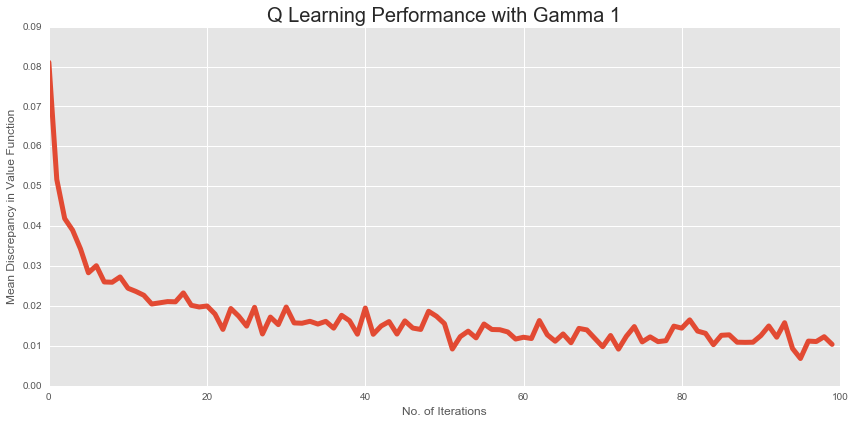

In [25]:
plt.figure(figsize=(12,6))
plt.plot(ql_3.mean_discrepancy, linewidth =5)
plt.xlabel("No. of Iterations")
plt.ylabel("Mean Discrepancy in Value Function")
plt.title('Q Learning Performance with Gamma %s' %ql_3.discount, fontsize=20)
plt.tight_layout()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text yticklabel objects>)

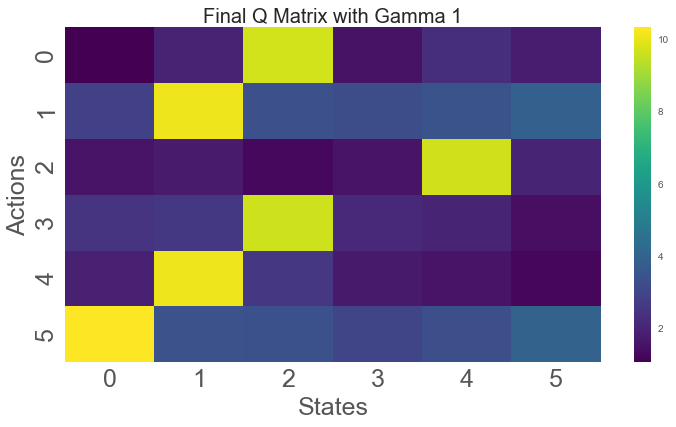

In [62]:
plt.figure(figsize=(12,6))
sns.heatmap(ql_3.Q, cmap=plt.cm.viridis)
plt.title('Final Q Matrix with Gamma %s' %ql_3.discount, fontsize=20)
plt.xlabel("States", fontsize=25)
plt.ylabel('Actions', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

## Comparison of Q Learning with Gamma values [0, 0.5 ,1]

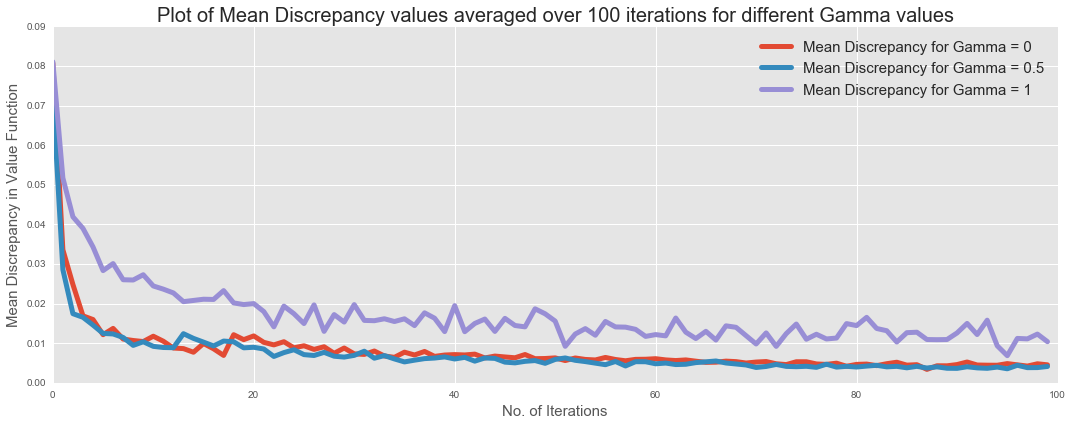

In [27]:
plt.figure(figsize=(15,6))
plt.plot(ql_1.mean_discrepancy, label='Mean Discrepancy for Gamma = 0', linewidth =5)
plt.plot(ql_2.mean_discrepancy, label='Mean Discrepancy for Gamma = 0.5', linewidth =5)
plt.plot(ql_3.mean_discrepancy, label='Mean Discrepancy for Gamma = 1', linewidth =5)
plt.title('Plot of Mean Discrepancy values averaged over 100 iterations for different Gamma values',
         fontsize=20)
plt.xlabel("No. of Iterations", fontsize=15)
plt.ylabel("Mean Discrepancy in Value Function", fontsize=15)
plt.legend(fontsize=15)
plt.tight_layout()

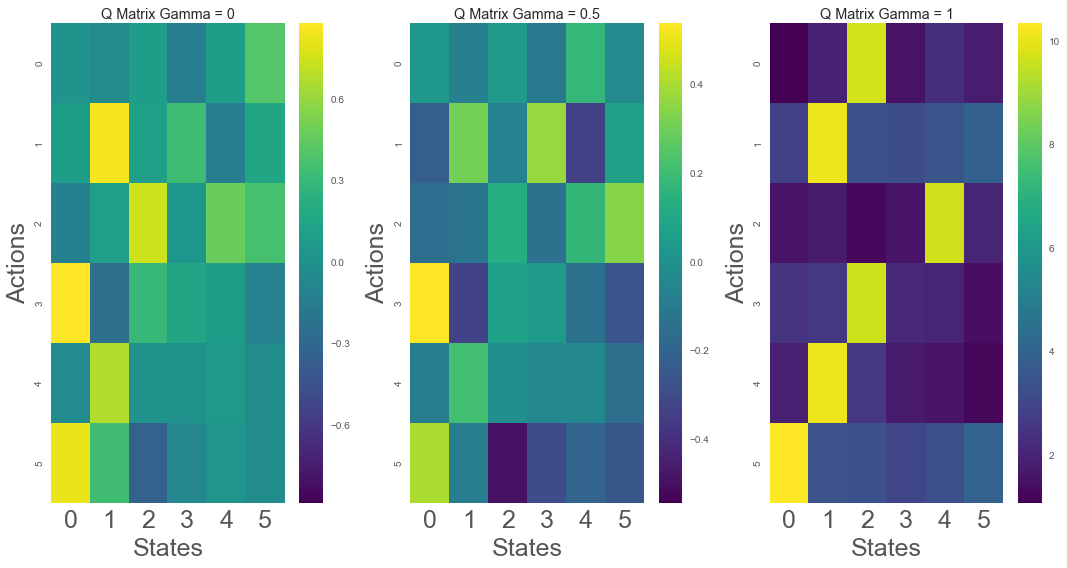

In [63]:
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
sns.heatmap(ql_1.Q, cmap=plt.cm.viridis)
plt.title("Q Matrix Gamma = 0")
plt.xlabel("States", fontsize=25)
plt.ylabel('Actions', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=10)

plt.subplot(1,3,2)
sns.heatmap(ql_2.Q, cmap=plt.cm.viridis)
plt.title("Q Matrix Gamma = 0.5")
plt.xlabel("States", fontsize=25)
plt.ylabel('Actions', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=10)

plt.subplot(1,3,3)
sns.heatmap(ql_3.Q, cmap=plt.cm.viridis)
plt.title("Q Matrix Gamma = 1")
plt.xlabel("States", fontsize=25)
plt.ylabel('Actions', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=10)

plt.tight_layout()

**It appears Q with Gamma = 0.5 gives the best results**

# Q Learning with different state and reward functions

We expand the scope of the problem where the agent now tries to find its way around a (10,10,10) grid. The agent has graduated to the real world since it is still a probabilistic situation we assume to have fullfilled the differnt state and reward function criterion from the previous phase

In [29]:
P2, R2 = mdptoolbox.example.rand(10,10, is_sparse=False)

In [30]:
P2[1:2,]

array([[[ 0.47638633,  0.        ,  0.        ,  0.        ,  0.        ,
          0.4786749 ,  0.        ,  0.        ,  0.        ,  0.04493877],
        [ 0.02128449,  0.08057477,  0.11273276,  0.06205292,  0.        ,
          0.09440775,  0.23739067,  0.00110388,  0.25034947,  0.14010328],
        [ 0.02480776,  0.02786922,  0.09032595,  0.24558928,  0.01430236,
          0.15815549,  0.24781808,  0.19113185,  0.        ,  0.        ],
        [ 0.09007138,  0.02072792,  0.07628214,  0.16840256,  0.02956166,
          0.23542671,  0.        ,  0.        ,  0.15210942,  0.2274182 ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.05882986,  0.12044782,  0.15320672,
          0.02422786,  0.15458296,  0.30484383,  0.        ,  0.18386096],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.2643553

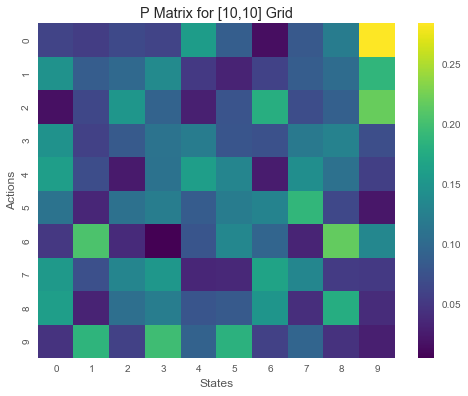

In [87]:
P2_x = np.sum(P2, axis=0)/P2.shape[0]
plt.figure(figsize=(8,6))
ax = sns.heatmap(P2_x, cmap=plt.cm.viridis)
ax.set(xlabel ="States", ylabel="Actions", title="P Matrix for [10,10] Grid")

In [31]:
R2[1:2,]

array([[[ 0.08852718,  0.        ,  0.        ,  0.        ,  0.        ,
         -0.6724465 ,  0.        , -0.        , -0.        , -0.4449276 ],
        [-0.97499635, -0.45640552,  0.65612984,  0.22572188,  0.        ,
          0.13983976,  0.15654991, -0.75820366, -0.35675485, -0.5483869 ],
        [ 0.08771878, -0.09092874, -0.2381622 , -0.0960959 ,  0.92957956,
          0.79738878,  0.08843746, -0.09917354, -0.        , -0.        ],
        [ 0.46929671, -0.83019184, -0.76611705, -0.95488333, -0.67524102,
          0.70972695, -0.        , -0.        ,  0.41396572,  0.53484852],
        [ 0.        ,  0.        , -0.        , -0.        , -0.01678224,
         -0.        , -0.        ,  0.        , -0.        , -0.        ],
        [-0.        , -0.        ,  0.76214798, -0.40819893, -0.06120668,
         -0.31257548,  0.71658568,  0.05378245,  0.        ,  0.10429216],
        [-0.        , -0.        , -0.        , -0.        , -0.        ,
         -0.        ,  0.5519538

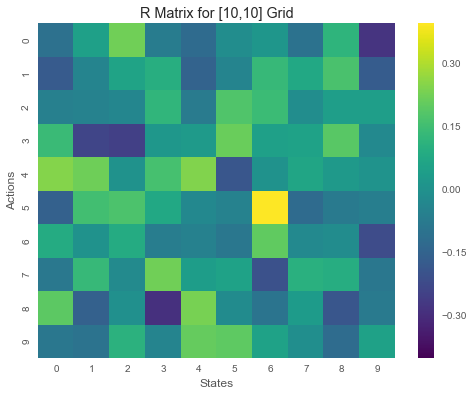

In [89]:
R2_x = np.sum(R2, axis=0)/R2.shape[0]
plt.figure(figsize=(8,6))
ax = sns.heatmap(R2_x, cmap=plt.cm.viridis)
ax.set(xlabel ="States", ylabel="Actions", title="R Matrix for [10,10] Grid")

In [91]:
ql_4 = mdp.mdp.QLearning(P2,R2,0.5)
print("Initial Values")
print("States \n", ql_4.S)
print("Actions \n", ql_4.A)
print("Q Matrix \n",ql_4.Q )
print("Rewards \n", ql_4.R[1:2,])
ql_4.run()

Initial Values
States 
 10
Actions 
 10
Q Matrix 
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
Rewards 
 [[[ 0.08852718  0.          0.          0.          0.         -0.6724465
    0.         -0.         -0.         -0.4449276 ]
  [-0.97499635 -0.45640552  0.65612984  0.22572188  0.          0.13983976
    0.15654991 -0.75820366 -0.35675485 -0.5483869 ]
  [ 0.08771878 -0.09092874 -0.2381622  -0.0960959   0.92957956  0.79738878
    0.08843746 -0.09917354 -0.         -0.        ]
  [ 0.46929671 -0.83019184 -0.76611705 -0.95488333 -0.67524102  0.70972695
   -0.         -0.          0.41396572  0.53484852]
 

In [33]:
import tabulate 
from tabulate import tabulate as tb
print("Q Matrix \n",tb(ql_4.Q, tablefmt="simple", numalign="left", floatfmt=".4f"))

Q Matrix 
 -------  -------  -------  -------  -------  -------  -------  -------  -------  -------
1.1294   -0.0168  0.1122   -0.0370  0.1651   -0.0782  -0.0635  0.2046   -0.2307  0.1357
0.1544   -0.0062  0.0214   0.0805   0.0160   0.0343   0.8512   0.1388   0.0208   0.0338
-0.1391  0.6187   0.0739   0.0556   -0.0631  0.1972   0.0295   -0.0196  0.1702   0.0034
0.7268   0.2559   0.2226   0.6180   0.1109   0.0615   0.2680   0.2609   0.0892   0.4497
0.0000   0.0095   0.0237   0.0493   0.0000   0.6340   0.0018   0.1571   0.0035   0.0627
0.8445   0.1200   0.1790   0.0984   0.0716   0.1542   0.0335   0.0424   0.1680   0.0794
1.3083   -0.0111  0.0108   0.1064   0.0089   0.0522   0.1320   0.0442   -0.1249  0.0511
0.2548   1.2668   -0.3058  0.4330   0.2494   -0.0903  0.1909   -0.0812  0.0333   0.0783
-0.0065  -0.0601  0.0998   0.1136   0.0010   0.5977   0.1142   0.2091   0.0660   -0.0739
0.1972   0.1023   -0.0133  0.0052   0.0009   0.0420   1.0688   0.0000   0.0000   -0.0181
-------  -------  

In [34]:
print('After Q Learing with Gamma %s' %ql_1.discount)
print("Actions :", ql_4.A)
print("Rewards \n",  ql_4.R[1:2,])
print("Optimal Policy :", ql_4.policy)
print("Time taken :%g"%ql_4.time)
print("Total Iterations :", ql_4.max_iter)

After Q Learing with Gamma 0.5
Actions : 10
Rewards 
 [[[ 0.08852718  0.          0.          0.          0.         -0.6724465
    0.         -0.         -0.         -0.4449276 ]
  [-0.97499635 -0.45640552  0.65612984  0.22572188  0.          0.13983976
    0.15654991 -0.75820366 -0.35675485 -0.5483869 ]
  [ 0.08771878 -0.09092874 -0.2381622  -0.0960959   0.92957956  0.79738878
    0.08843746 -0.09917354 -0.         -0.        ]
  [ 0.46929671 -0.83019184 -0.76611705 -0.95488333 -0.67524102  0.70972695
   -0.         -0.          0.41396572  0.53484852]
  [ 0.          0.         -0.         -0.         -0.01678224 -0.         -0.
    0.         -0.         -0.        ]
  [-0.         -0.          0.76214798 -0.40819893 -0.06120668 -0.31257548
    0.71658568  0.05378245  0.          0.10429216]
  [-0.         -0.         -0.         -0.         -0.         -0.
    0.55195389  0.         -0.38649619 -0.        ]
  [-0.         -0.          0.          0.88401461  0.         -0.        

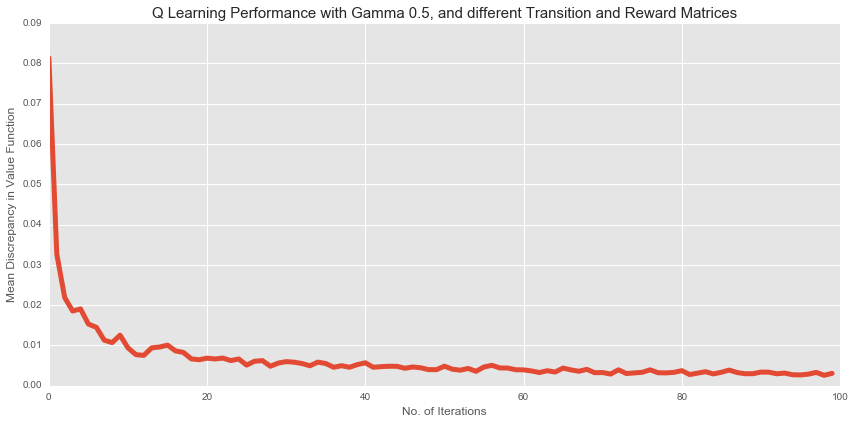

In [35]:
plt.figure(figsize=(12,6))
plt.plot(ql_4.mean_discrepancy, linewidth = 5)
plt.xlabel("No. of Iterations")
plt.ylabel("Mean Discrepancy in Value Function")
plt.title('Q Learning Performance with Gamma %s, and different Transition and Reward Matrices' %ql_4.discount,
         fontsize = 15)
plt.tight_layout()

## With 20,000 Iterations

In [36]:
ql_5 = mdp.mdp.QLearning(P2,R2,0.5,  n_iter=20000)
print("Initial Values")
print("States \n", ql_5.S)
print("Actions \n", ql_5.A)
print("Q Matrix \n",ql_5.Q )
print("Rewards \n", ql_5.R[1:2,])
ql_5.run()

Initial Values
States 
 10
Actions 
 10
Q Matrix 
 [[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
Rewards 
 [[[ 0.08852718  0.          0.          0.          0.         -0.6724465
    0.         -0.         -0.         -0.4449276 ]
  [-0.97499635 -0.45640552  0.65612984  0.22572188  0.          0.13983976
    0.15654991 -0.75820366 -0.35675485 -0.5483869 ]
  [ 0.08771878 -0.09092874 -0.2381622  -0.0960959   0.92957956  0.79738878
    0.08843746 -0.09917354 -0.         -0.        ]
  [ 0.46929671 -0.83019184 -0.76611705 -0.95488333 -0.67524102  0.70972695
   -0.         -0.          0.41396572  0.53484852]
 

In [37]:
print('After Q Learing with Gamma %s' %ql_5.discount)
print("Actions :", ql_5.A)
print("Q Matrix \n",tb(ql_5.Q, tablefmt="plain", numalign="left", floatfmt=".4f"))
print("Rewards \n", ql_5.R[1:2,])
print("Optimal Policy :", ql_5.policy)
print("Time taken :%g"%ql_5.time)
print("Total Iterations :", ql_5.max_iter)

After Q Learing with Gamma 0.5
Actions : 10
Q Matrix 
 1.2166   0.0536   0.1081   -0.1444  0.1894   -0.2022  -0.0080  0.2881  0.0549   0.2234
0.1254   0.0990   -0.0152  0.1908   0.1881   0.0383   0.9297   0.1471  0.1358   0.2353
-0.1419  0.1934   0.1153   0.0426   -0.0438  0.0589   0.0883   0.0593  1.6533   0.1233
0.2609   0.1672   0.3415   0.4863   0.1452   0.1460   0.7403   0.2447  0.1658   0.3759
0.0582   0.0352   0.1037   0.1024   0.1059   0.1533   0.1085   0.9512  -0.0456  0.1158
0.9252   0.3491   0.2879   0.1870   0.1448   0.3571   -0.0402  0.1559  0.1940   0.2369
1.3657   -0.0378  -0.0110  0.4322   0.0944   0.0824   0.3390   0.1907  0.0006   -0.2900
0.1302   1.2734   -0.1080  0.2335   0.2132   -0.1927  0.2157   0.0253  0.0843   0.2186
-0.1810  -0.0684  -0.0271  -0.0391  0.0111   0.1079   0.5546   0.1479  0.1706   -0.0933
0.6302   0.0271   0.0015   0.0111   0.0200   0.0759   0.0233   0.0193  0.0297   -0.0306
Rewards 
 [[[ 0.08852718  0.          0.          0.          0.        

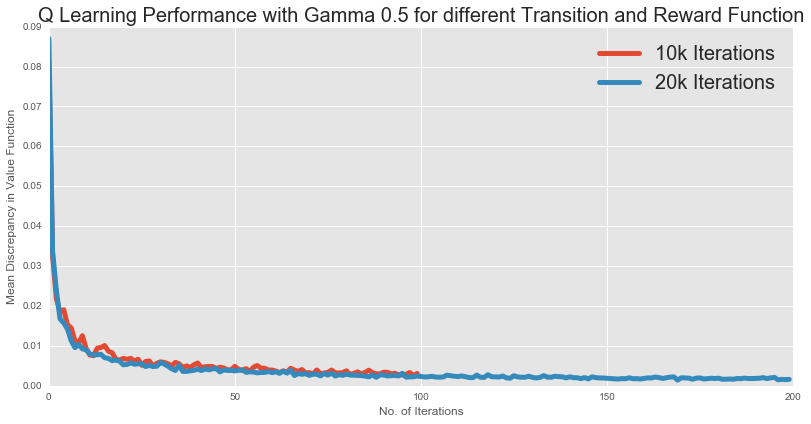

In [38]:
plt.figure(figsize=(12,6))
plt.plot(ql_4.mean_discrepancy, label='10k Iterations', linewidth = 5)
plt.plot(ql_5.mean_discrepancy, label='20k Iterations', linewidth = 5)
plt.xlabel("No. of Iterations")
plt.ylabel("Mean Discrepancy in Value Function")
plt.title('Q Learning Performance with Gamma %s for different Transition and Reward Function' %ql_5.discount, 
          fontsize=20)
plt.legend(fontsize=20)
plt.tight_layout()

**The Mean Discrepancy is calculated as Max_Iterations/100 as noted previously so the second case has extra 100 points**

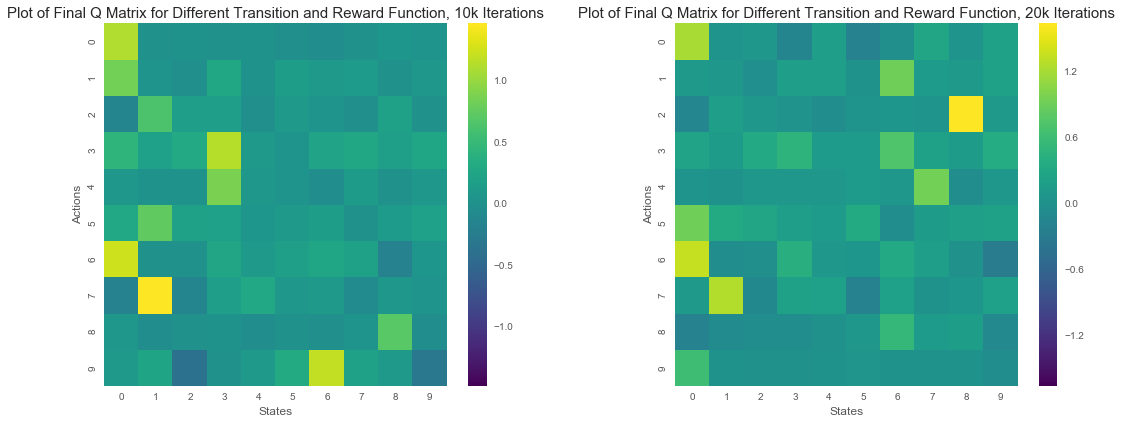

In [93]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.title("Plot of Final Q Matrix for Different Transition and Reward Function, 10k Iterations", fontsize=15)
ax =sns.heatmap(ql_4.Q, cmap=plt.cm.viridis)
ax.set(xlabel ="States", ylabel="Actions")

plt.subplot(1,2,2)
plt.title("Plot of Final Q Matrix for Different Transition and Reward Function, 20k Iterations", fontsize=15)
ax1 = sns.heatmap(ql_5.Q, cmap=plt.cm.viridis)
ax1.set(xlabel ="States", ylabel="Actions")
plt.tight_layout()

# 100 x100 Grid - navigating a more 'realistic' world

In [40]:
P4, R4 = mdp.example.rand(100,100)

In [41]:
print(P4.shape[0])
print(P4.shape[1])

100
100


In [42]:
print(R4.shape[0])
print(R4.shape[1])

100
100


**We noted that the Gamma values of 0 and 0.5 gave a stable performance so we use these two values to test the Q Learning on the larger grid **

In [43]:
ql_6 = mdp.mdp.QLearning(P4,R4,0.5, n_iter=50000)
ql_6.run()
ql_7 = mdp.mdp.QLearning(P4,R4,0, n_iter=50000)
ql_7.run()

## Performance Comparison

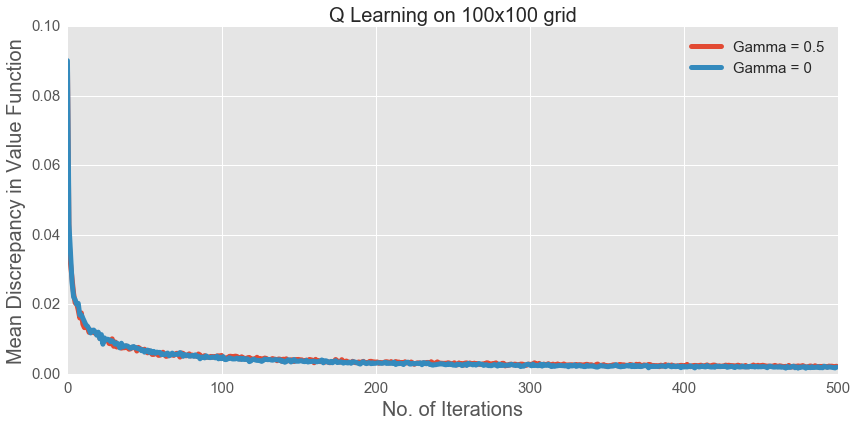

In [44]:
plt.figure(figsize=(12,6))
plt.plot(ql_6.mean_discrepancy, linewidth =5, label='Gamma = 0.5')
plt.plot(ql_7.mean_discrepancy, linewidth =5, label='Gamma = 0')
plt.xlabel("No. of Iterations", fontsize=20)
plt.ylabel("Mean Discrepancy in Value Function", fontsize=20)
plt.title('Q Learning on 100x100 grid', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.tight_layout()

## Q Matrix Comparison

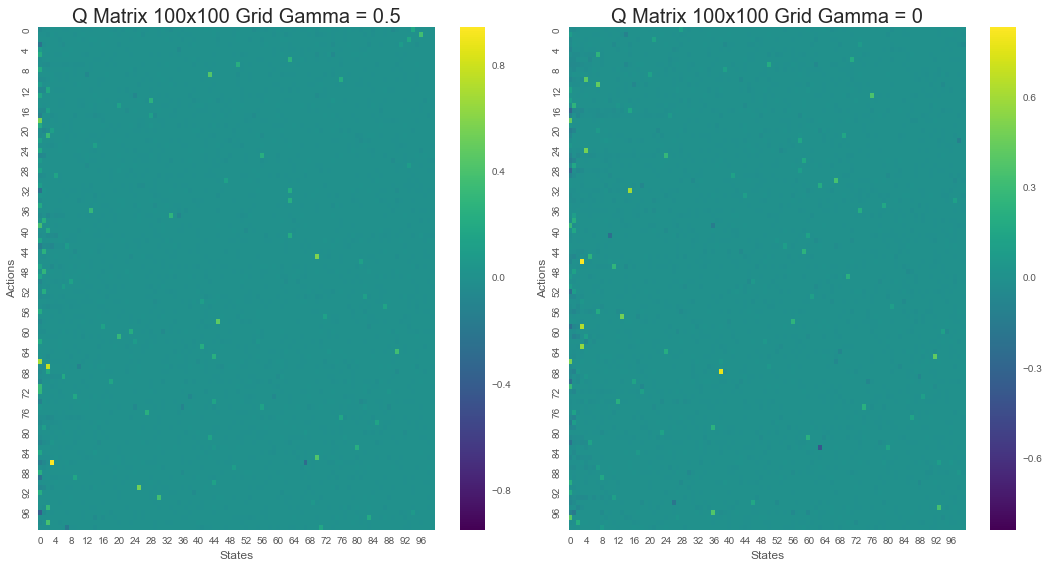

In [95]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title("Q Matrix 100x100 Grid Gamma = 0.5", fontsize = 20)
ax =sns.heatmap(ql_6.Q, cmap=plt.cm.viridis, xticklabels=4, yticklabels=4)
ax.set(xlabel ="States", ylabel="Actions")

plt.subplot(1,2,2)
plt.title("Q Matrix 100x100 Grid Gamma = 0", fontsize=20)
ax1= sns.heatmap(ql_7.Q, cmap=plt.cm.viridis, xticklabels=4, yticklabels=4)
ax1.set(xlabel ="States", ylabel="Actions")
plt.tight_layout()

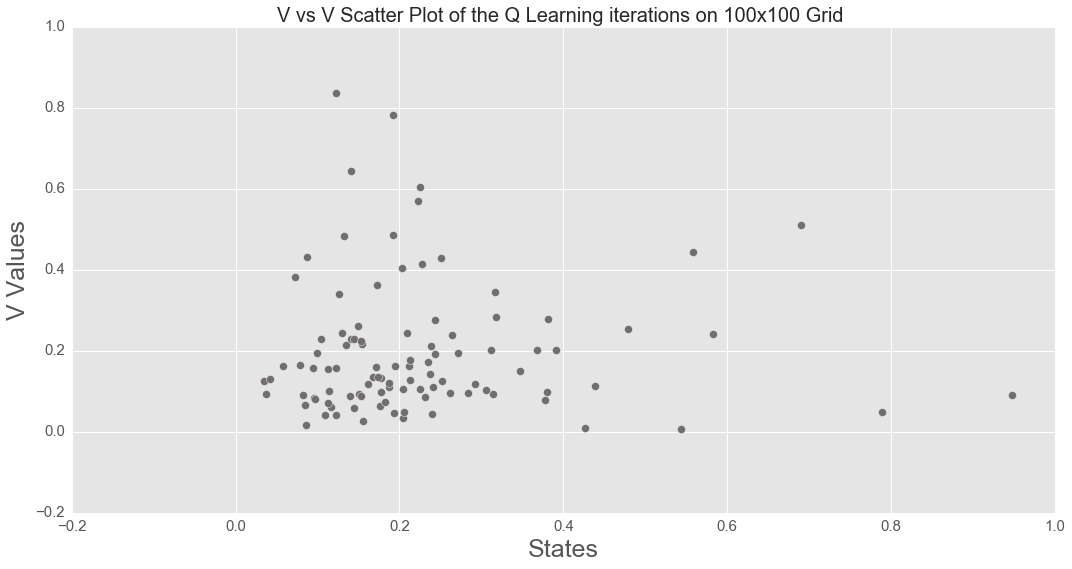

In [96]:
plt.figure(figsize=(15,8))
plt.title("V vs V Scatter Plot of the Q Learning iterations on 100x100 Grid ", fontsize=20)
plt.scatter(ql_6.V, ql_7.V,c='#726E6D', s=65)
plt.ylabel("V Values", fontsize=25)
plt.xlabel('States', fontsize=25)
plt.xticks( fontsize=15)
plt.yticks( fontsize=15)
plt.tight_layout()

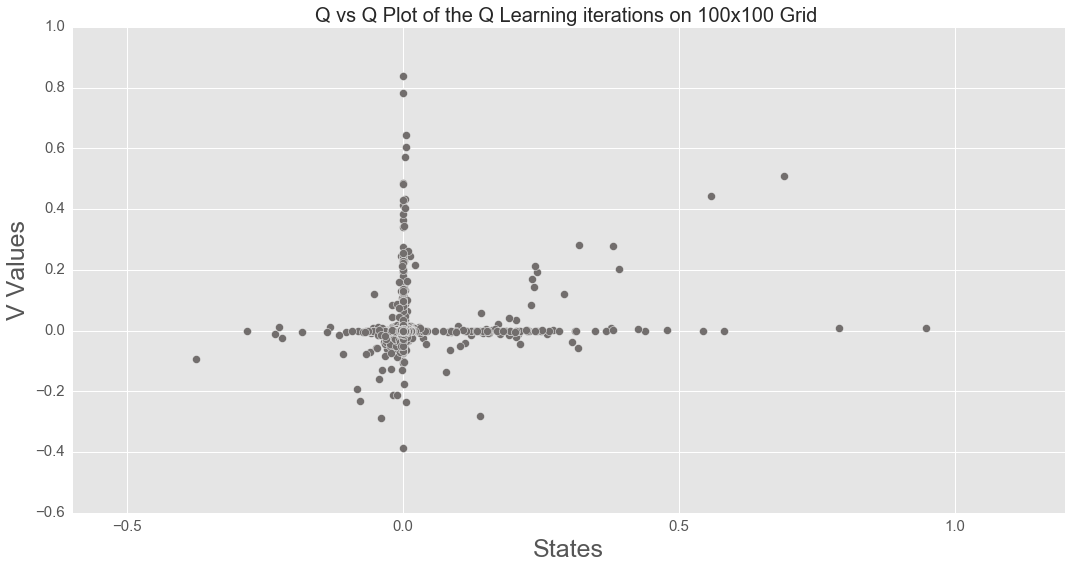

In [97]:
plt.figure(figsize=(15,8))
plt.title("Q vs Q Plot of the Q Learning iterations on 100x100 Grid ", fontsize=20)
plt.scatter(ql_6.Q, ql_7.Q, c='#726E6D',s=65)
plt.ylabel("V Values", fontsize=25)
plt.xlabel('States', fontsize=25)
plt.xticks( fontsize=15)
plt.yticks( fontsize=15)
plt.tight_layout()

# Comparisons

In this section we look at some statistics from the different Q Learning iterations that we have performed.

## How do the Optimal Policies compare between the different runs of Q Learning?

In [48]:
import pandas as pd

In [49]:
ql_ix = ["QL G=0.5",
         "QL G=0",
         "QL G=1",
         "QL Diff S,R,10K",
         "QL Diff S,R,20K",
         "QL Big Grid G=0.5",
         "QL Big Grid G=0"
    ]

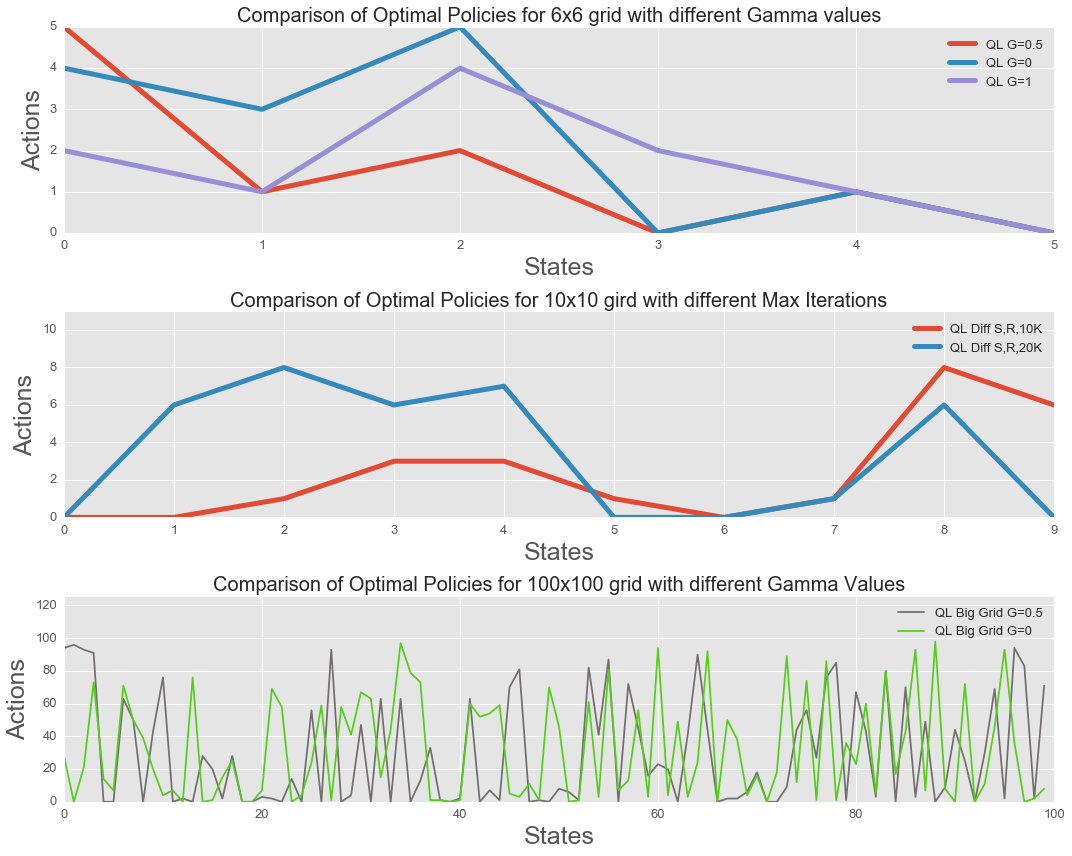

In [98]:
plt.figure(figsize=(15,12))

#first grid 6,6
plt.subplot(311)
plt.title('Comparison of Optimal Policies for 6x6 grid with different Gamma values',fontsize=20)
plt.plot(ql_1.policy, label=ql_ix[0], linewidth=5)
plt.plot(ql_2.policy, label=ql_ix[1], linewidth=5)
plt.plot(ql_3.policy, label=ql_ix[2], linewidth=5)
plt.legend(fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Actions", fontsize=25)
plt.xlabel('States', fontsize=25)

#second grid 10,10
plt.subplot(312)
plt.title('Comparison of Optimal Policies for 10x10 gird with different Max Iterations',fontsize=20)
plt.plot(ql_4.policy, label=ql_ix[3], linewidth=5)
plt.plot(ql_5.policy, label=ql_ix[4], linewidth=5)
plt.legend(fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(np.min(ql_5.policy),np.max(ql_5.policy)+3)
plt.ylabel("Actions", fontsize=25)
plt.xlabel('States', fontsize=25)

#final big grid 100,100
plt.subplot(313)
plt.title("Comparison of Optimal Policies for 100x100 grid with different Gamma Values", fontsize=20)
plt.plot(ql_6.policy, '#726E6D', label=ql_ix[5])
plt.plot(ql_7.policy, '#52D017', label=ql_ix[6])
plt.legend(fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(np.min(ql_6.policy),np.max(ql_6.policy)+30)
plt.ylabel("Actions", fontsize=25)
plt.xlabel('States', fontsize=25)
plt.tight_layout()


## How do the V Values compare between the different runs?

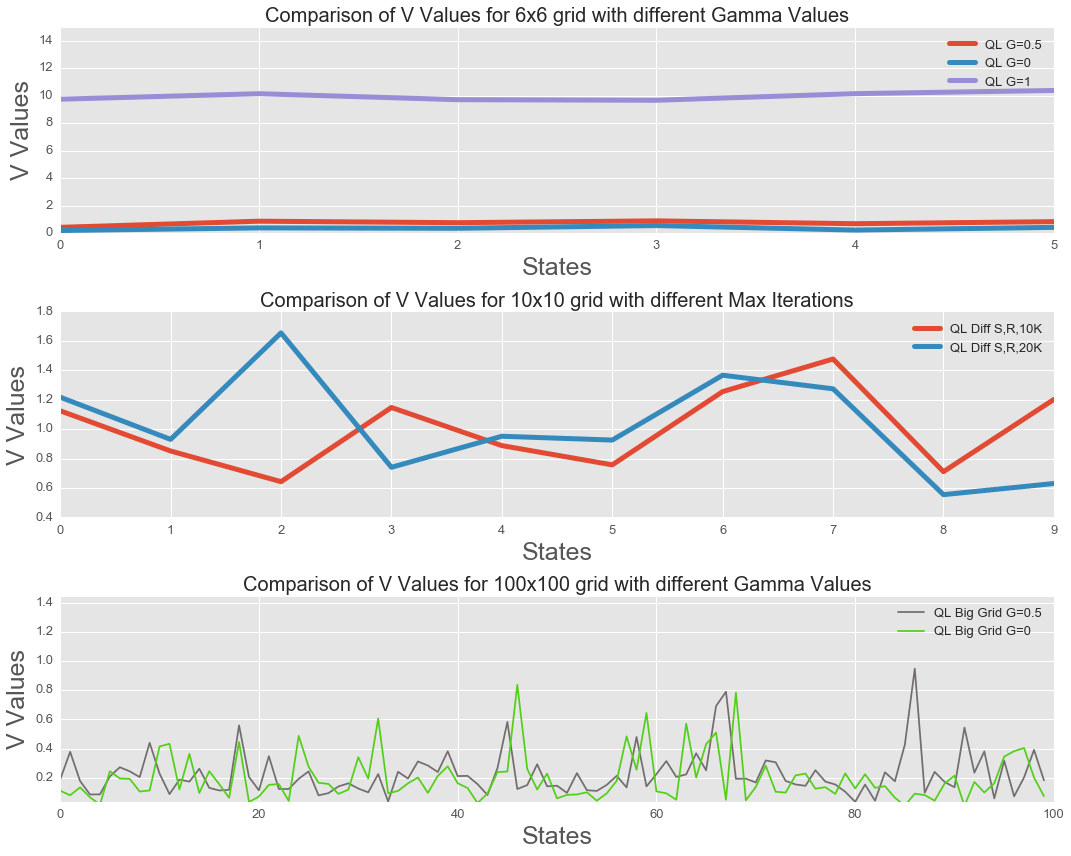

In [99]:
plt.figure(figsize=(15,12))

#first grid 6,6
plt.subplot(311)
plt.title('Comparison of V Values for 6x6 grid with different Gamma Values',fontsize=20)
plt.plot(ql_1.V, label=ql_ix[0], linewidth=5)
plt.plot(ql_2.V, label=ql_ix[1], linewidth=5)
plt.plot(ql_3.V, label=ql_ix[2], linewidth=5)
plt.legend(fontsize=13)
plt.xticks(fontsize=13)
plt.ylim(0,15)
plt.yticks(fontsize=13)
plt.ylabel("V Values", fontsize=25)
plt.xlabel('States', fontsize=25)

#second grid 10,10
plt.subplot(312)
plt.title('Comparison of V Values for 10x10 grid with different Max Iterations',fontsize=20)
plt.plot(ql_4.V, label=ql_ix[3], linewidth=5)
plt.plot(ql_5.V, label=ql_ix[4], linewidth=5)
plt.legend(fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("V Values", fontsize=25)
plt.xlabel('States', fontsize=25)

#final big grid 100,100
plt.subplot(313)
plt.title("Comparison of V Values for 100x100 grid with different Gamma Values", fontsize=20)
plt.plot(ql_6.V, '#726E6D', label=ql_ix[5])
plt.plot(ql_7.V, '#52D017', label=ql_ix[6])
plt.legend(fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(np.min(ql_6.V),np.max(ql_6.V)+0.5)
plt.ylabel("V Values", fontsize=25)
plt.xlabel('States', fontsize=25)

plt.tight_layout()

## How does the performance compare for the different iterations?

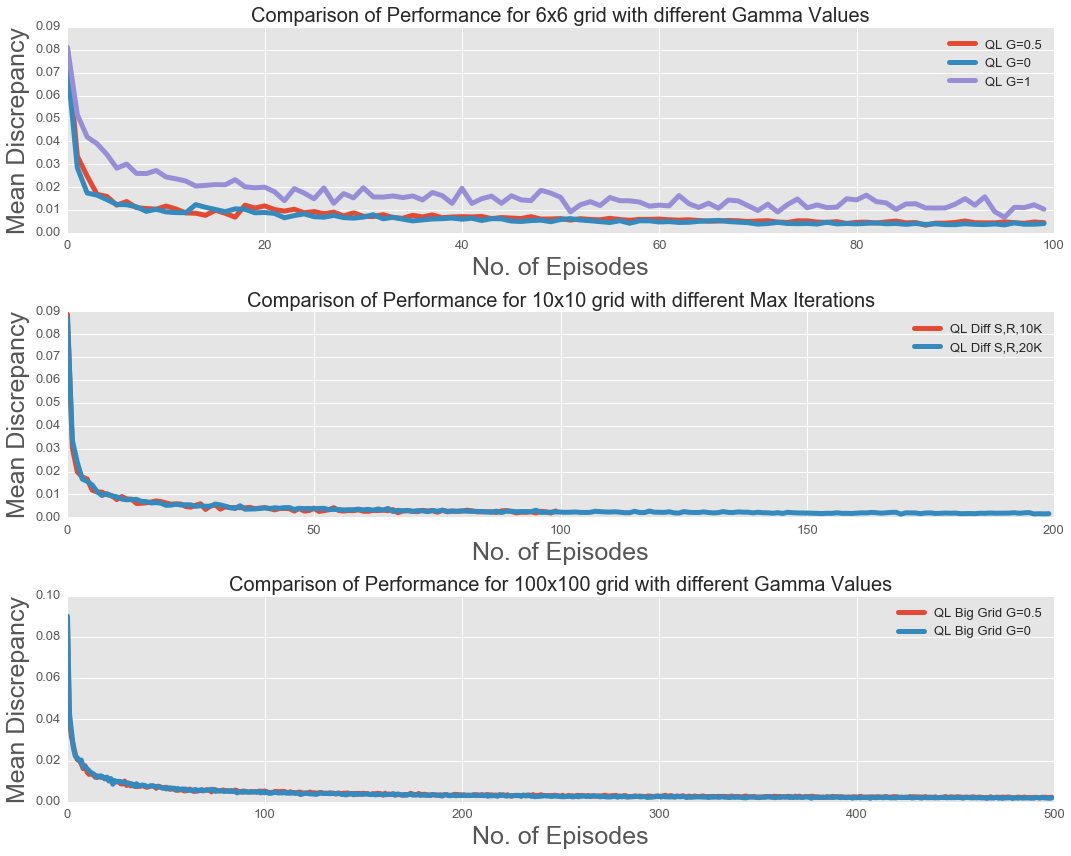

In [100]:
plt.figure(figsize=(15,12))

#first grid 6,6
plt.subplot(311)
plt.title('Comparison of Performance for 6x6 grid with different Gamma Values',fontsize=20)
plt.plot(ql_1.mean_discrepancy, label=ql_ix[0], linewidth=5)
plt.plot(ql_2.mean_discrepancy, label=ql_ix[1], linewidth=5)
plt.plot(ql_3.mean_discrepancy, label=ql_ix[2], linewidth=5)
plt.legend(fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Mean Discrepancy", fontsize=25)
plt.xlabel('No. of Episodes', fontsize=25)

#second grid 10,10
plt.subplot(312)
plt.title('Comparison of Performance for 10x10 grid with different Max Iterations',fontsize=20)
plt.plot(ql_4.mean_discrepancy, label=ql_ix[3], linewidth=5)
plt.plot(ql_5.mean_discrepancy, label=ql_ix[4], linewidth=5)
plt.legend(fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Mean Discrepancy", fontsize=25)
plt.xlabel('No. of Episodes', fontsize=25)

#final big grid 100,100
plt.subplot(313)
plt.title("Comparison of Performance for 100x100 grid with different Gamma Values", fontsize=20)
plt.plot(ql_6.mean_discrepancy, label=ql_ix[5], linewidth=5)
plt.plot(ql_7.mean_discrepancy, label=ql_ix[6], linewidth=5)
plt.legend(fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("Mean Discrepancy", fontsize=25)
plt.xlabel('No. of Episodes', fontsize=25)
plt.tight_layout()

## How do the runtimes compare between the different iterations?

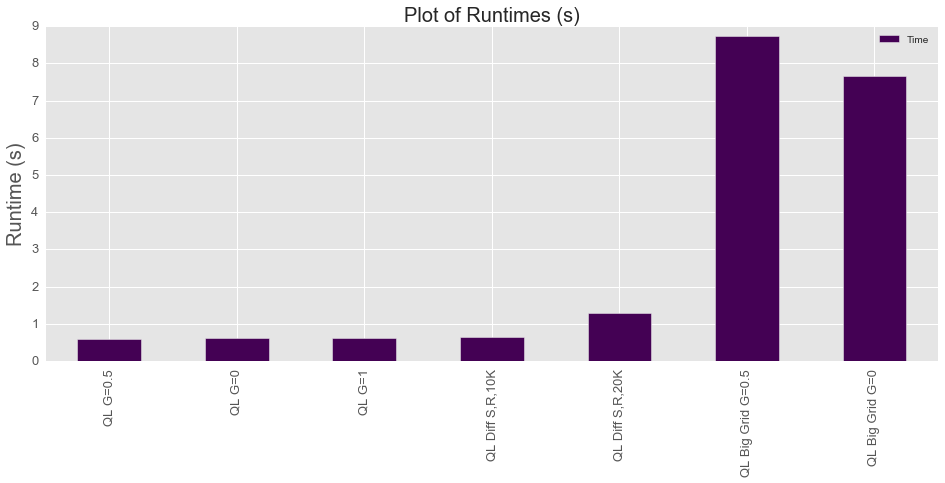

In [53]:
time = pd.DataFrame([ql_1.time,ql_2.time,ql_3.time,ql_4.time, ql_5.time,ql_6.time, ql_7.time], index=ql_ix)
time.columns = ['Time']

time.plot(kind='bar', colormap=plt.cm.viridis, figsize=(16,6))
plt.title('Plot of Runtimes (s)', fontsize=20)
plt.ylabel('Runtime (s)', fontsize=20)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [54]:
print(tb(time))

-----------------  --------
QL G=0.5           0.605089
QL G=0             0.609527
QL G=1             0.609409
QL Diff S,R,10K    0.64066
QL Diff S,R,20K    1.28131
QL Big Grid G=0.5  8.72751
QL Big Grid G=0    7.67015
-----------------  --------


In [55]:
print("Ratio of fastest to slowest run: %g"%((time.min()/time.max())))

Ratio of fastest to slowest run: 0.0693313


# Extensions

In [101]:
import scipy
from scipy.fftpack import *

In [102]:
f = lambda x: (x / (x + 2)**1/4)
val =  f(np.arange(1000))

(array([  1.00000000e-07,   1.00000000e-06,   1.00000000e-05,
          1.00000000e-04,   1.00000000e-03,   1.00000000e-02,
          1.00000000e-01,   1.00000000e+00,   1.00000000e+01]),
 <a list of 9 Text yticklabel objects>)

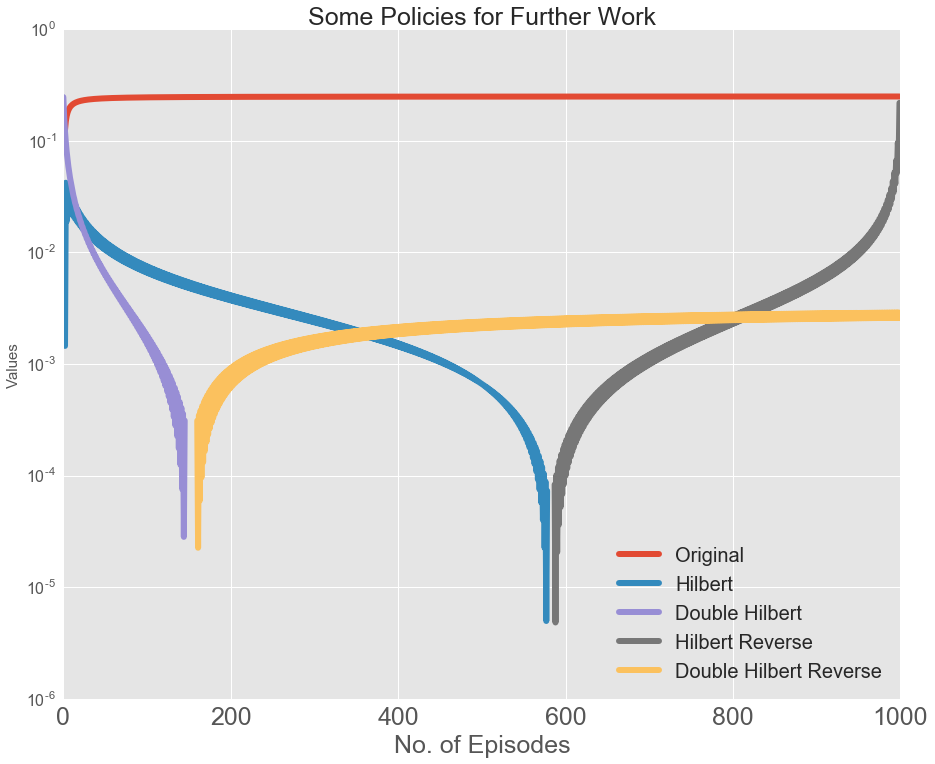

In [103]:
plt.figure(figsize=(15,12))
plt.semilogy(val, label='Original', linewidth=6)
plt.semilogy(hilbert(val), label='Hilbert', linewidth=6)
plt.semilogy(hilbert(hilbert(val)), label='Double Hilbert', linewidth=6)
plt.semilogy(hilbert(val)*-1, label='Hilbert Reverse', linewidth=6)
plt.semilogy(hilbert(hilbert(val))*-1, label='Double Hilbert Reverse', linewidth=6)
plt.legend(fontsize=20, loc=4)

plt.title('Some Policies for Further Work', fontsize=25)
plt.xlabel("No. of Episodes", fontsize=25)
plt.ylabel("Values", fontsize=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=16)

In [ ]:
plt.figure(figsize=(20,20))
plt.subplots(411)
plt.plot(discrepa)
plt.legend(fontsize=20, loc=1)
plt.title('Some Policies for Further Work', fontsize=25)
plt.xlabel("No. of Episodes", fontsize=25)
plt.ylabel("Values", fontsize=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=16)